### A/B Testing


The humble A/B test (also known as a randomised controlled trial, or RCT, in the other sciences) is a powerful tool for product development.


Imagine that you are CEO of Amazon, and trying to work out whether rearranging your website into a new format affects conversion rate (i.e. the proportion of visitors to Amazon who become customers):


#### Principles of A/B tests 

We might start thinking about an A/B test based on a question or idea from a colleague. For example, we might have a hunch that SMS reminders for loan repayments will reduce loan defaults. With a little bit of work we can take this question and turn it into a hypothesis and then an A/B test that will evaluate the exact gain (or lack of gain) that results from the new SMS system. 

Notably, a hypothesis should include reference to the population under study (Amazon.com US visitors), the intervention (website layout A and B), the comparison group (what are comparing to), the outcome (what will you measure) and the time (at what point will you measure it). 

PICOT= Population, Intervention, Comparison, Outcome, Time. 

Remember PICOT when defining your hypotheses. 

To give an example of a well formed hypothesis from our Amazon example:

Null hypothesis (H0): Amazon.com visitors that receive Layout B will not have higher end-of-visit conversion rates compares to visitors that receive Layout A.

Alternative hypothesis (H1): Amazon.com visitors that receive Layout B will have higher end-of-visit conversion rates compared to visitors that receive layout A


In this notebook, we will work on the weigh of chicks on two different diets. We will 
1- specify a null Ho (assumed to be True) and an alternative hypothesis. Weight gain is the same under both diets 2 and 3.

2- Choose a test statistic to compare what we observe in our data to what we expect if Ho is true, determine the distribution of the test statistic under Ho. we will compare the abolute mean difference.


3- convert the test statistic to a p-value (the probability of observing what we did in our sample or something even more extreme if the Ho is true).

The question is: do these diets differ? we will compare the mean weight under the different diets. To compare the means we can use large sample approaches such as T-test. The medians can be compared using noparametric approaches like The Mann-Whitney U test. Permutation or bootstrap approaches can be used. The permutation approach may be used when the sample size is small or if the assumption for parametric approaches (T-test) is not met or if you are testting something different than classsic statistics like mean and media (for exaple, comparing 10 percentile)or if it is difficult to estimate the SE for the test statistic 


In [1]:
clear all 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
df=pd.read_csv('ChickWeight.csv')

In [4]:
df.head()

,Unnamed: 0,weight,Time,Chick,Diet
0,1,42,0,1,1
1,2,51,2,1,1
2,3,59,4,1,1
3,4,64,6,1,1
4,5,76,8,1,1


In [5]:
df.groupby('Diet')['weight'].count()

Diet
1    220
2    120
3    120
4    118
Name: weight, dtype: int64

In [6]:
df.Diet.unique()

array([1, 2, 3, 4])

In [12]:
# We will work on only diet 2 and 3
df1=df[df['Diet'].isin([2,3])]
df1.head(3)

,Unnamed: 0,weight,Time,Chick,Diet
220,221,40,0,21,2
221,222,50,2,21,2
222,223,62,4,21,2


In [13]:
weight_diet=df1[['weight','Diet']]

In [14]:
weight_diet.groupby('Diet')['weight'].count()

Diet
2    120
3    120
Name: weight, dtype: int64

Text(0.5, 0, 'Weight')

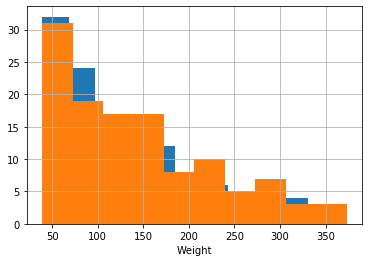

In [15]:
weight_diet[weight_diet['Diet']==2]['weight'].hist()
weight_diet[weight_diet['Diet']==3]['weight'].hist()
plt.xlabel('Weight')

In [16]:
dd=weight_diet.groupby('Diet')['weight'].mean()
dd

Diet
2    122.616667
3    142.950000
Name: weight, dtype: float64

In [17]:
dd.diff()['weight'].values[1]

KeyError: 'weight'

In [18]:
def mean_diff(df1, weight, labels):
    dd=weight_diet.groupby(labels)['weight'].mean()
    m=dd.values[0]-dd.values[1]
    return m


In [19]:
mean_diff(df1,'weight','Diet')

-20.33333333333333

In [20]:
labels=weight_diet['Diet'].tolist()
shuffled_labels = random.sample(labels, len(labels))
weight_diet['shuffled_labels']=shuffled_labels
type(shuffled_labels)

/home/bashar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


list

In [21]:
mean_diff(df1,'weight','shuffled_labels')

14.933333333333337

In [22]:
repetitions_num=1000
difference=[]
for i in range(repetitions_num):
    shuffled_labels = random.sample(labels, len(labels))
    weight_diet['shuffled_labels']=shuffled_labels
    m=mean_diff(df1,'weight','shuffled_labels')
    difference.append(m)

/home/bashar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(array([  2.,  12.,  50., 116., 214., 249., 197., 107.,  41.,  12.]),
 array([-36.93333333, -30.15333333, -23.37333333, -16.59333333,
         -9.81333333,  -3.03333333,   3.74666667,  10.52666667,
         17.30666667,  24.08666667,  30.86666667]),
 <a list of 10 Patch objects>)

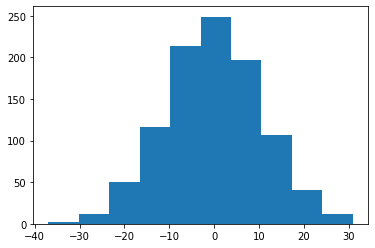

In [23]:
plt.hist(difference)

In [24]:
observed_mean_difference=mean_diff(df1,'weight','Diet')
observed_mean_difference

-20.33333333333333

Under the Null hypothesis, the distribution of the difference between the two groups should be centred around zero. That makes sense as the H0 assumes that there is not difference between the group averages. 

In [25]:
import numpy as np
empirical_P = np.count_nonzero(difference >= abs(observed_mean_difference)) / repetitions_num
empirical_P

0.029

The P-value=0.022<0.05 which means that Ho is rejected. 

Reference:

https://towardsdatascience.com/data-science-you-need-to-know-a-b-testing-f2f12aff619a

https://rethinkingclinicaltrials.org/chapters/design/experimental-designs-randomization-schemes-top/cluster-randomized-trials/

https://www.youtube.com/watch?v=9_A8xw8bheA

https://s4be.cochrane.org/blog/2013/08/23/a-20-minute-introduction-to-cluster-randomised-trials/

https://www.youtube.com/watch?v=FlQVQz5d02s

https://inferentialthinking.com/chapters/12/1/AB_Testing.html
https://www.youtube.com/watch?v=rJ3AZCQuiLw
